# DiscreteDistribution

GTSAM Copyright 2010-2022, Georgia Tech Research Corporation,
Atlanta, Georgia 30332-0415
All Rights Reserved

Authors: Frank Dellaert, et al. (see THANKS for the full author list)

See LICENSE for the license information

<a href="https://colab.research.google.com/github/borglab/gtsam/blob/develop/gtsam/discrete/doc/DiscreteDistribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
try:
    import google.colab
    %pip install --quiet gtsam
except ImportError:
    pass  # Not running on Colab, do nothing

A `DiscreteDistribution` is a `DiscreteConditional` with no parents. It represents a prior probability on a single discrete variable, e.g., $P(X)$. It can be thought of as a special case of a factor, specifically one that sums to 1.

It derives from `gtsam.DiscreteConditional` and can be used interchangeably with a `DecisionTreeFactor` or `DiscreteConditional` in most contexts, such as adding it to a `DiscreteFactorGraph` or `DiscreteBayesNet`.

In [2]:
import gtsam
import numpy as np
import graphviz

from gtsam.symbol_shorthand import X

## Creating a DiscreteDistribution

A `DiscreteDistribution` is defined on a single `DiscreteKey`, which is a tuple of a gtsam `Key` (integer) and the variable's cardinality (number of possible outcomes). They can be constructed in several ways.

In [3]:
# Define a key for a binary variable (cardinality=2)
X0 = (X(0), 2)

# --- Method 1: From a spec string ---
# The string "1/9" specifies the probabilities for X0=0 and X0=1.
dd_string = gtsam.DiscreteDistribution(X0, "1/9")
print("Created from string:")
dd_string.print()

# --- Method 2: From a list of probabilities ---
dd_vector = gtsam.DiscreteDistribution(X0, [0.1, 0.9])
print("\nCreated from vector:")
dd_vector.print()

Created from string:
Discrete Prior
 P( x0 ):
 Choice(x0) 
 0 Leaf  0.1
 1 Leaf  0.9


Created from vector:
Discrete Prior
 P( x0 ):
 Choice(x0) 
 0 Leaf  0.1
 1 Leaf  0.9



## Operations on DiscreteDistribution

In [4]:
# --- Evaluate the probability of a specific outcome ---
# This uses the __call__ method.
prob_X0_is_0 = dd_string(0)
prob_X0_is_1 = dd_string(1)
print(f"P(X0=0) = {prob_X0_is_0}")
print(f"P(X0=1) = {prob_X0_is_1}")

# --- Retrieve the Probability Mass Function (PMF) ---
pmf = dd_string.pmf()
print(f"\nPMF vector: {pmf}")

P(X0=0) = 0.1
P(X0=1) = 0.9

PMF vector: [0.1, 0.9]


Since `DiscreteDistribution` is a type of factor, it can be visualized.

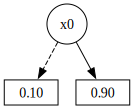

In [5]:
# Visualize the factor
# For a single-variable factor, this is just a single node.
graphviz.Source(dd_string.dot())

### Displaying with Markdown/HTML
In a Jupyter environment, GTSAM objects often have a rich HTML display.

In [6]:
dd_string

x0,value
0,0.1
1,0.9
